Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data=pd.read_csv("Alphabets_data.csv")
Data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [2]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [3]:
Data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
# there are ni missing values in the dataset

In [5]:
Data.describe().round(2)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,4.02,7.04,5.12,5.37,3.51,6.90,7.50,4.63,5.18,8.28,6.45,7.93,3.05,8.34,3.69,7.80
std,1.91,3.30,2.01,2.26,2.19,2.03,2.33,2.70,2.38,2.49,2.63,2.08,2.33,1.55,2.57,1.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,5.00,4.00,4.00,2.00,6.00,6.00,3.00,4.00,7.00,5.00,7.00,1.00,8.00,2.00,7.00
50%,4.00,7.00,5.00,6.00,3.00,7.00,7.00,4.00,5.00,8.00,6.00,8.00,3.00,8.00,3.00,8.00
75%,5.00,9.00,6.00,7.00,5.00,8.00,9.00,6.00,7.00,10.00,8.00,9.00,4.00,9.00,5.00,9.00
max,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00


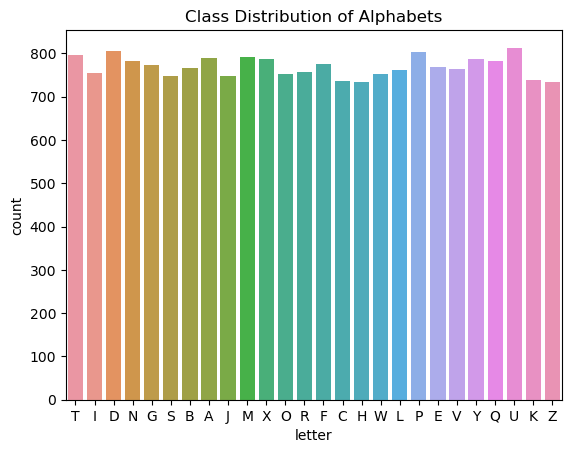

In [6]:
sns.countplot(x='letter', data=Data)
plt.title("Class Distribution of Alphabets")
plt.show()

In [7]:
# frequency distribution of individual letters within a given dataset

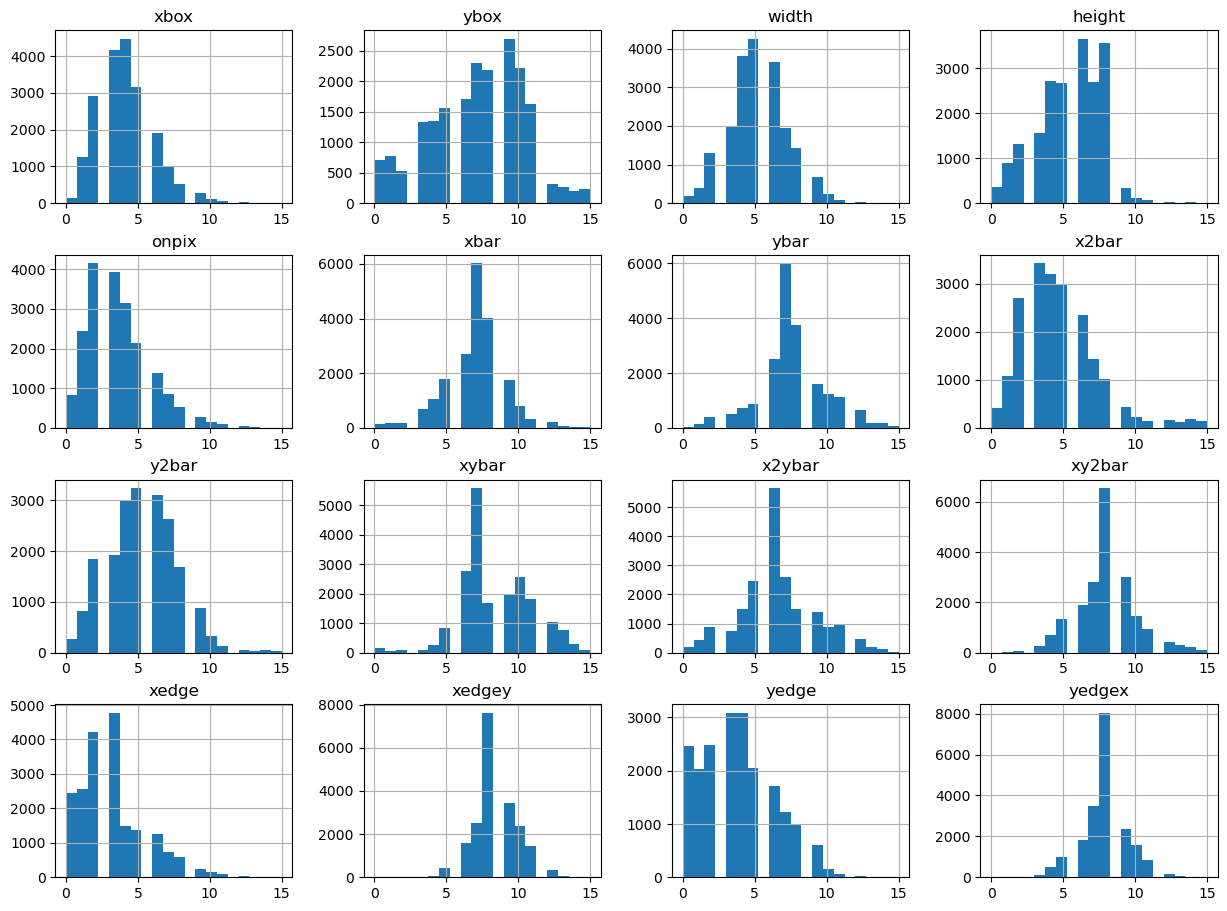

In [8]:
Data.hist(bins=20,figsize=(15,11))
plt.show()

In [9]:
Data_X = Data.drop("letter", axis=1)
Data_y = Data["letter"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Data_X)

In [11]:
X_scaled

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [12]:
le = LabelEncoder()
y_encoded = le.fit_transform(Data_y)

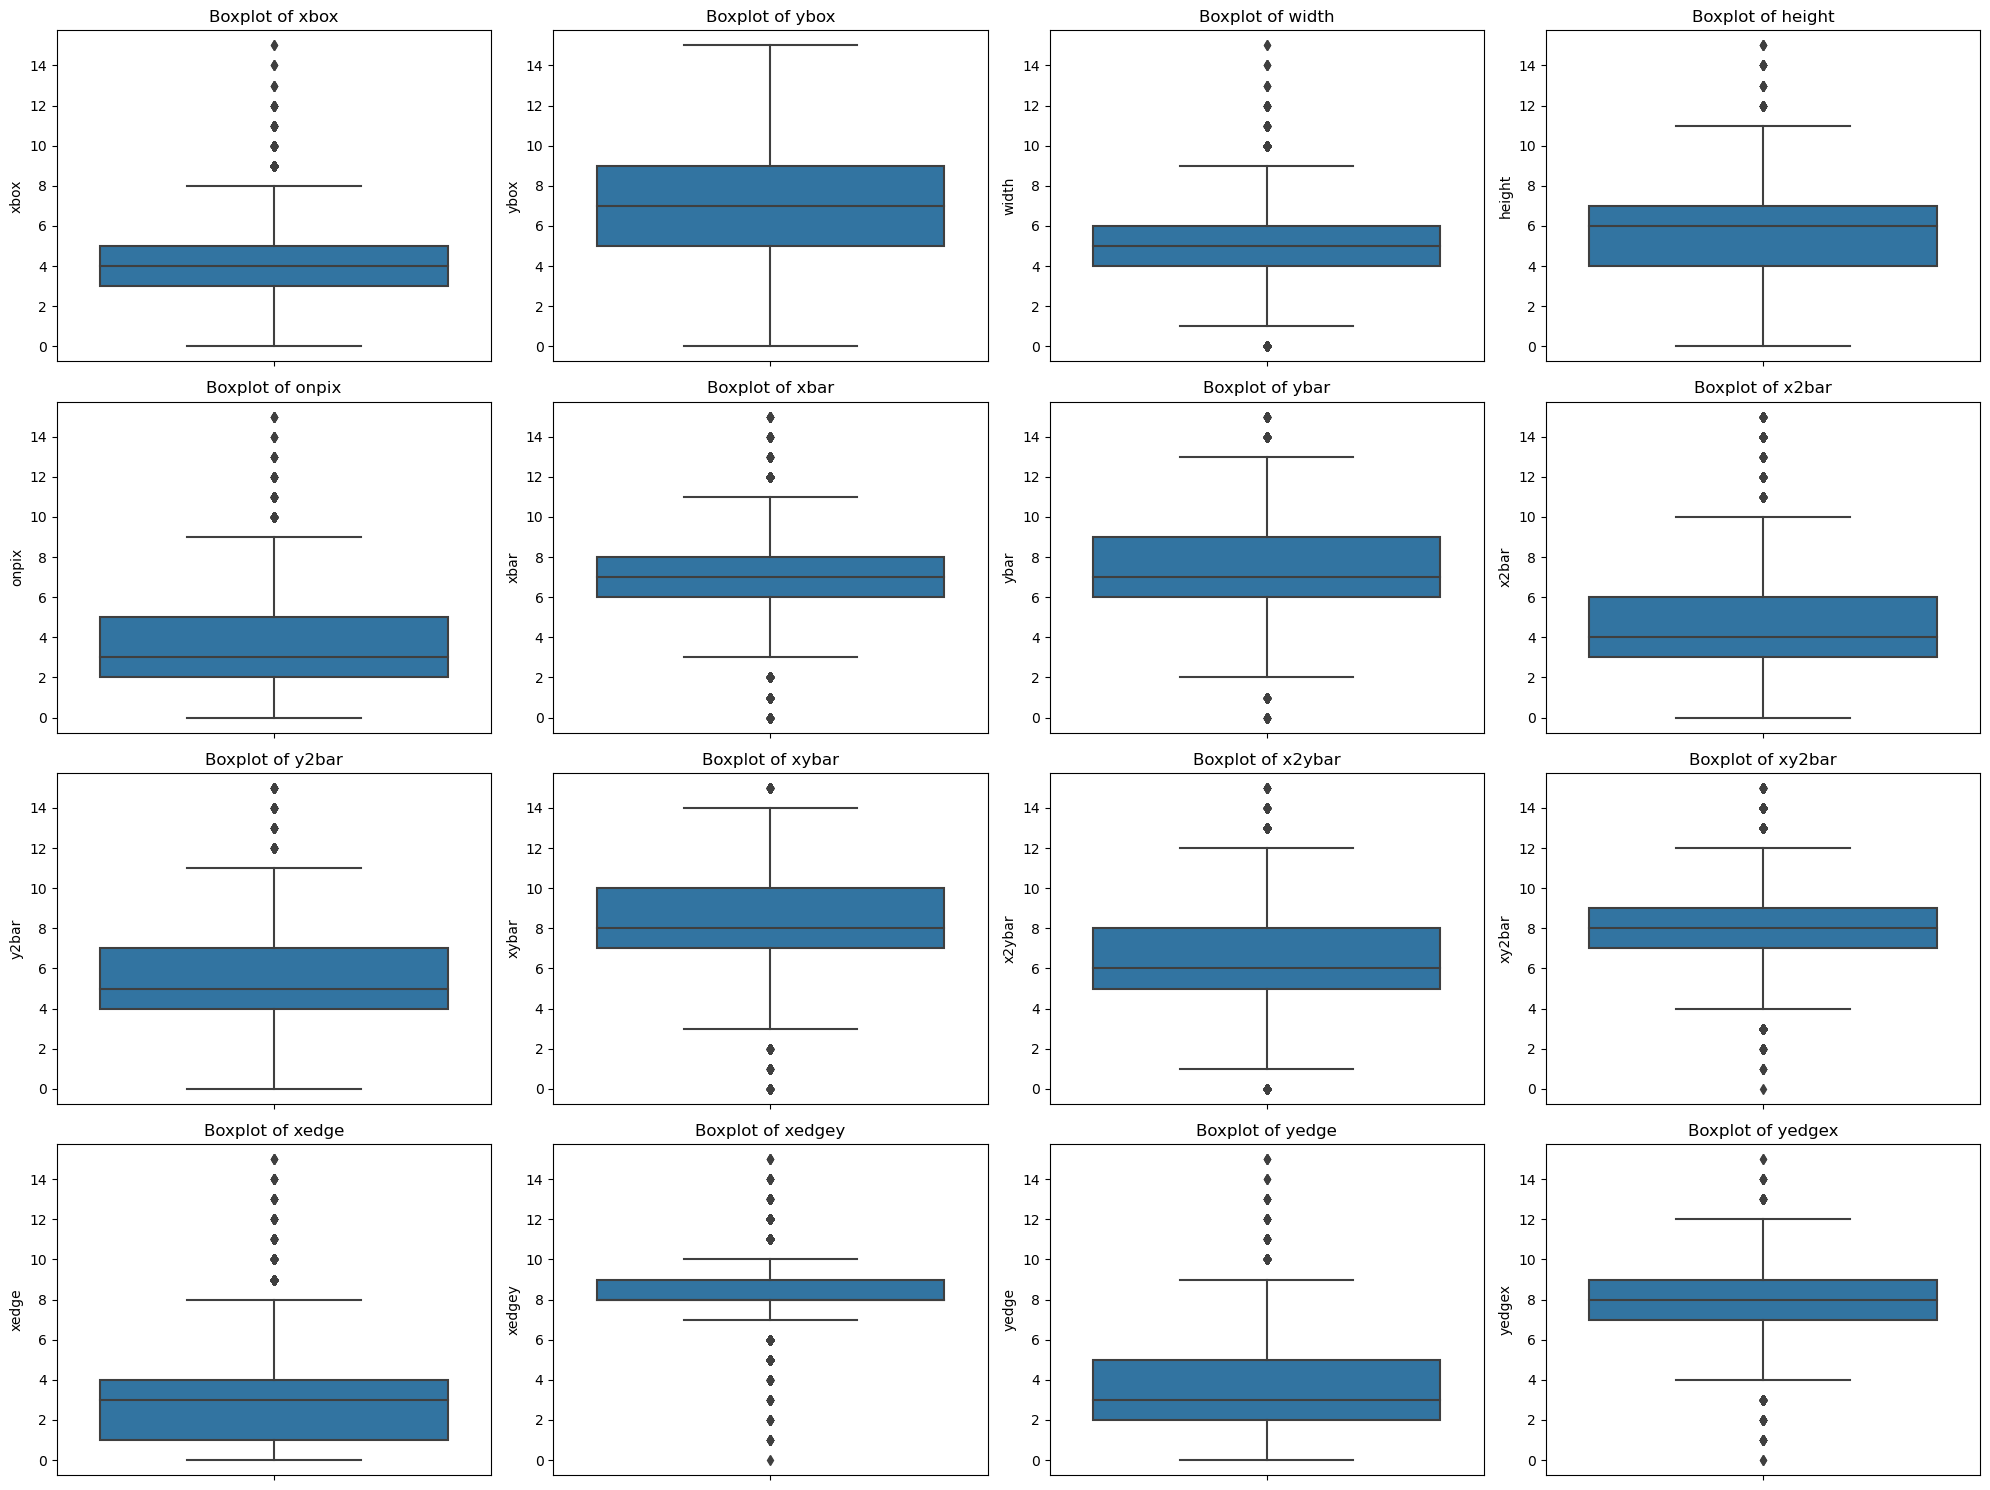

In [13]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(Data_X.columns, 1):
    plt.subplot(4, 4, i) 
    sns.boxplot(y=Data_X[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

In [14]:
# boxplot for finding outliers 


In [15]:
# Treating outlioers with IQR method
Data_columns = ['xbox', 'width', 'height', 'onpix', 'xbar', 'ybar',	'x2bar','y2bar','xybar','x2ybar','xy2bar','xedge','xedgey','yedge','yedgex'] 
for col in Data_columns:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Data[col] = Data[col].clip(lower, upper)

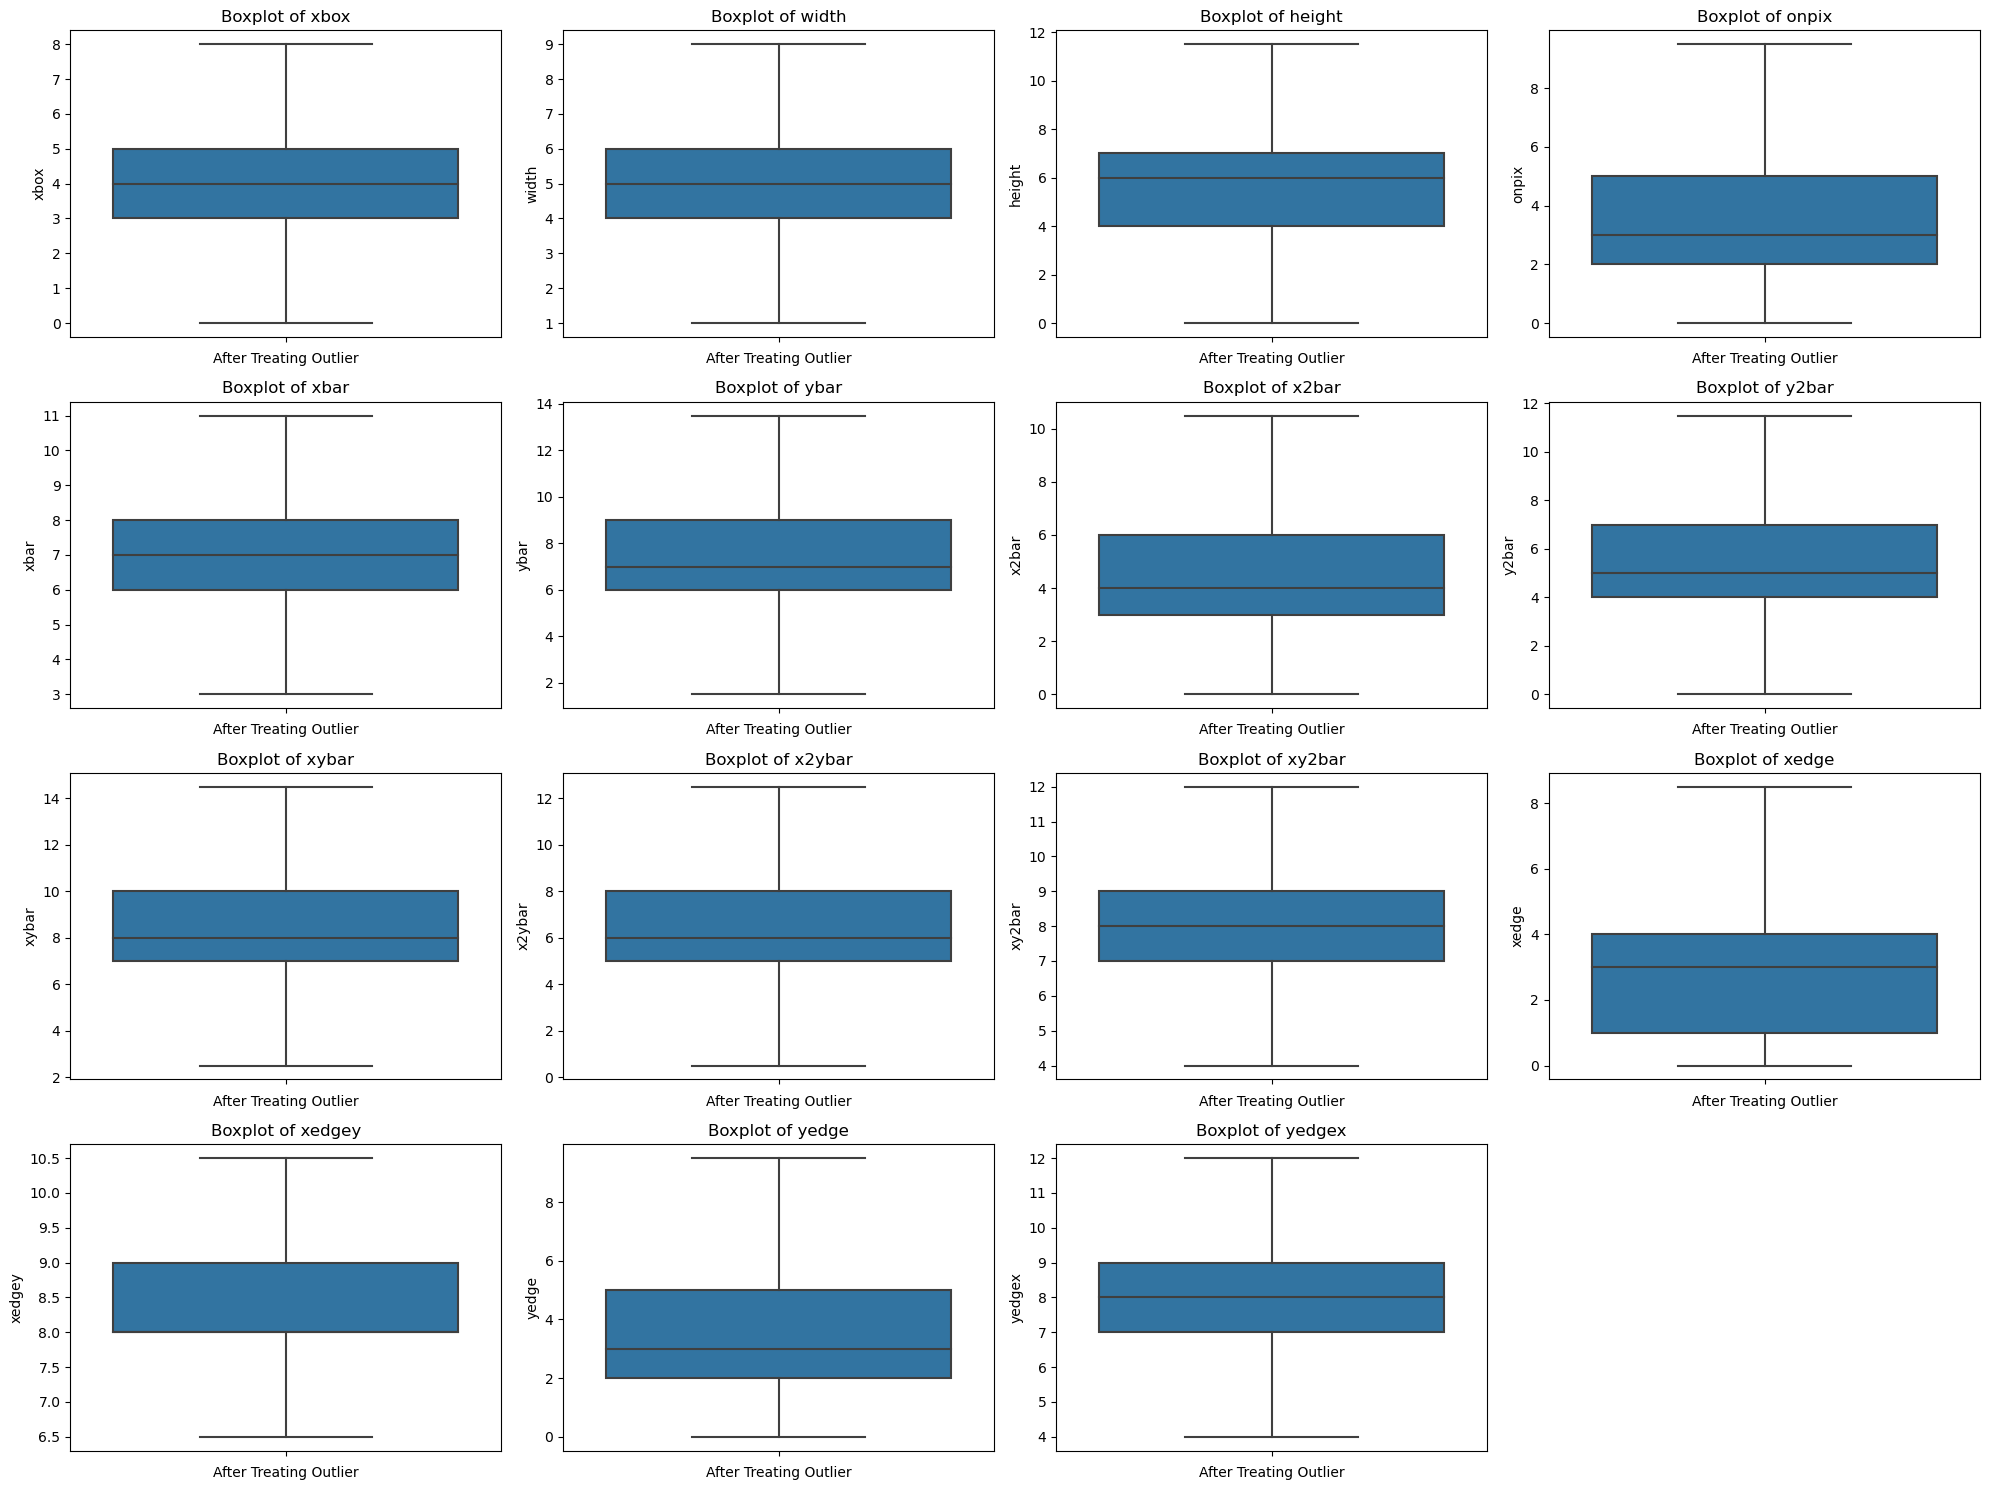

In [16]:
# plot after treating outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(Data_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=Data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel("After Treating Outlier")
plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [18]:
# using tesnsor flow to train the model and keras is an API to build neural network

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
num_classes = y_train_cat.shape[1]
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
450/450 [==============================] - 1s 1ms/step - loss: 2.0453 - accuracy: 0.4744 - val_loss: 1.3004 - val_accuracy: 0.6731
Epoch 2/20
450/450 [==============================] - 1s 1ms/step - loss: 1.0819 - accuracy: 0.7083 - val_loss: 0.9484 - val_accuracy: 0.7469
Epoch 3/20
450/450 [==============================] - 0s 988us/step - loss: 0.8490 - accuracy: 0.7633 - val_loss: 0.7932 - val_accuracy: 0.7937
Epoch 4/20
450/450 [==============================] - 0s 1ms/step - loss: 0.7256 - accuracy: 0.7962 - val_loss: 0.7010 - val_accuracy: 0.8131
Epoch 5/20
450/450 [==============================] - 1s 1ms/step - loss: 0.6435 - accuracy: 0.8207 - val_loss: 0.6321 - val_accuracy: 0.8375
Epoch 6/20
450/450 [==============================] - 1s 1ms/step - loss: 0.5827 - accuracy: 0.8360 - val_loss: 0.5859 - val_accuracy: 0.8444
Epoch 7/20
450/450 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.8515 - val_loss: 0.5419 - val_accuracy: 0.8569
Epoc

In [21]:
# An epoch is when your model looks at all the training data once.

In [22]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

125/125 [==============================] - 0s 767us/step
Test Accuracy: 0.91025
Classification Report:
               precision    recall  f1-score   support

           A       0.97      0.94      0.95       158
           B       0.81      0.92      0.86       153
           C       0.94      0.94      0.94       147
           D       0.89      0.93      0.91       161
           E       0.84      0.92      0.88       154
           F       0.89      0.81      0.85       155
           G       0.90      0.88      0.89       155
           H       0.90      0.80      0.84       147
           I       0.97      0.86      0.91       151
           J       0.97      0.95      0.96       149
           K       0.92      0.89      0.90       148
           L       0.96      0.91      0.94       152
           M       0.94      0.93      0.94       158
           N       0.90      0.90      0.90       157
           O       0.90      0.90      0.90       150
           P       0.95      0.

In [23]:
# the model accuracy is 90% which means it predicts well 

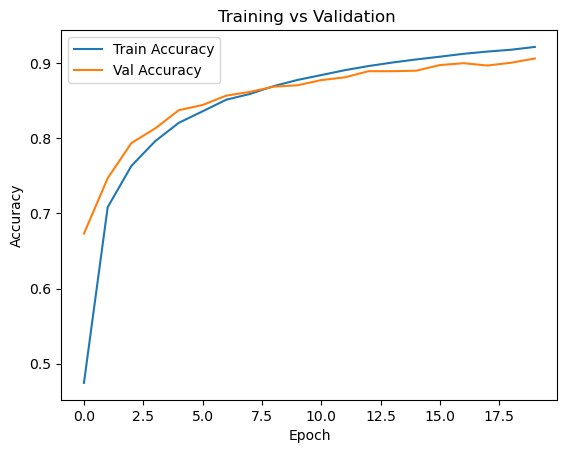

In [24]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# the accuracy is increasing as the epoch is increasing. it is increasing from 47% to 92%.
# from the graph we know that model is improving where validation is close to training data

In [26]:
!pip install tensorflow keras-tuner

In [27]:
def build_model(hidden_layers=1, neurons=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
param_space = {
    'hidden_layers': [1, 2, 3],
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.005, 0.01]
}

In [34]:
import random
from tensorflow.keras.optimizers import Adam
n_trials = 10
best_val_acc = 0
best_params = None
best_model = None
for i in range(n_trials):
    params = {
        'hidden_layers': random.choice(param_space['hidden_layers']),
        'neurons': random.choice(param_space['neurons']),
        'activation': random.choice(param_space['activation']),
        'learning_rate': random.choice(param_space['learning_rate']),
    }
    print(f"\n Trial {i+1}/{n_trials} — Testing: {params}")
    model = build_model(**params)
    history = model.fit(X_train, y_train_cat,
                        validation_split=0.1,
                        epochs=10,
                        batch_size=32,
                        verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f" Validation Accuracy: {val_acc:.4f}")
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = params
        best_model = model


 Trial 1/10 — Testing: {'hidden_layers': 1, 'neurons': 128, 'activation': 'tanh', 'learning_rate': 0.01}
 Validation Accuracy: 0.9306

 Trial 2/10 — Testing: {'hidden_layers': 1, 'neurons': 128, 'activation': 'relu', 'learning_rate': 0.005}
 Validation Accuracy: 0.9413

 Trial 3/10 — Testing: {'hidden_layers': 1, 'neurons': 64, 'activation': 'tanh', 'learning_rate': 0.005}
 Validation Accuracy: 0.9194

 Trial 4/10 — Testing: {'hidden_layers': 2, 'neurons': 64, 'activation': 'relu', 'learning_rate': 0.01}
 Validation Accuracy: 0.9212

 Trial 5/10 — Testing: {'hidden_layers': 2, 'neurons': 64, 'activation': 'tanh', 'learning_rate': 0.001}
 Validation Accuracy: 0.9069

 Trial 6/10 — Testing: {'hidden_layers': 3, 'neurons': 64, 'activation': 'relu', 'learning_rate': 0.005}
 Validation Accuracy: 0.9094

 Trial 7/10 — Testing: {'hidden_layers': 2, 'neurons': 32, 'activation': 'tanh', 'learning_rate': 0.01}
 Validation Accuracy: 0.8975

 Trial 8/10 — Testing: {'hidden_layers': 2, 'neurons': 

In [30]:
# using random search for finding the best hyperparameter for neural network. and saving the best model.

In [31]:
print("\n Best Parameters Found:", best_params)
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)
print("\n Test Classification Report:")
print(classification_report(y_true, y_pred))


🏆 Best Parameters Found: {'hidden_layers': 2, 'neurons': 128, 'activation': 'relu', 'learning_rate': 0.001}
Best Validation Accuracy: 0.9356
125/125 [==============================] - 0s 1ms/step

📊 Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       158
           1       0.89      0.95      0.92       153
           2       0.95      0.98      0.96       147
           3       0.96      0.92      0.94       161
           4       0.92      0.93      0.93       154
           5       0.89      0.94      0.92       155
           6       0.95      0.92      0.93       155
           7       0.78      0.88      0.82       147
           8       0.89      0.95      0.92       151
           9       0.96      0.91      0.93       149
          10       0.95      0.88      0.91       148
          11       0.99      0.95      0.97       152
          12       0.98      0.96      0.97       158
          13   

In [ ]:
# The best model had: 1 hidden layer, 128 neurons, Tanh activation, Learning rate: 0.005
#It achieved: Validation Accuracy: 92.94%, Test Accuracy: 94%
# The model performs well across all 26 classes, with high precision, recall, and F1-scores.